# BEE 4750 Homework 1: Introduction to Using Julia

**Name**:

**ID**:

> **Due Date**
>
> Friday, 9/8/23, 9:00pm

## Overview

### Instructions

-   Problems 1-3 consist of a series of code snippets for you to
    interpret and debug. For Problems 1 and 2, you will be asked to
    identify relevant error(s) and fix the code. For Problem 3, the code
    works as intended; your goal is to identify the code’s purpose by
    following its logic.
-   Problem 4 asks you to convert a verbal description of a wastewater
    treatment system into a Julia function, and then to use that
    function to explore the impact of different wastewater allocation
    strategies.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [136]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `~/github-classroom/BEE4750-FA23/hw01-josephjoonlee`


In [137]:
using Plots
using GraphRecipes
using LaTeXStrings
using Statistics # needed for mean function

## Problems (Total: 40 Points)

### Problem 1 (8 points)

You’ve been tasked with writing code to identify the minimum value in an
array. You cannot use a predefined function. Your colleague suggested
the function below, but it does not return the minimum value.

In [138]:
function minimum(array)
    min_value = 0
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 0


#### Problem 1.1 (3 points)

Describe the logic error.

In the function, min_value starts at 0. This doesn't work since min_value will only change if a value in the array is less than zero. Therefore, it will always return 0, since there are no numbers less than 0 in the array.

#### Problem 1.2 (3 points)

Write a fixed version of the function.

In [139]:
function minimum(array)
    min_value = array[1]
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end



minimum (generic function with 1 method)

#### Problem 1.3 (2 points)

Use your fixed function to find the minimum value of `array_values`.

In [140]:
array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 78


### Problem 2 (8 points)

Your team is trying to compute the average grade for your class, but the
following code produces an error.

In [141]:
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = mean(student_grades)
  return average_grade
end

@show average_grade;

LoadError: UndefVarError: `average_grade` not defined

#### Problem 2.1 (3 points)

Describe the logic and/or syntax error.

In the code provided, the function class_average was never called. Therefore, the class_average function was never run on the array, student_grades. 
Another reason it didn't work is because average_grade is a local variable, therefore calling for it outside the function would not result in it being displayed. 

#### Problem 2.2 (3 points)

Write a fixed version of the code.

In [142]:
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = mean(student_grades)
  return average_grade
end

class_average(student_grades)


94.4

#### Problem 2.3 (2 points)

Use your fixed code to compute the average grade for the class.

In [143]:
class_average(student_grades)

94.4

### Problem 3 (8 points)

You’ve been handed some code to analyze. The original coder was not very
considerate of other potential users: the function is called
`mystery_function` and there are no comments explaining the purpose of
the code. It appears to take in an array and return some numbers, and
you’ve been assured that the code works as intended.

In [144]:
function mystery_function(values)
    y = [] # creates empty array
    for v in values
        if !(v in y) # check if element is not in y
            append!(y, v) # adds unique element to y
        end
    end
    return y
end

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values);

mystery_function(list_of_values) = Any[1, 2, 3, 4]


#### Problem 3.1 (4 points)

Explain the purpose of `mystery_function`.

mystery_function returns an array of every unique value in the input array. 

#### Problem 3.2 (4 points)

Add comments to the code, explaining why and how it works. Refer to
[“Best Practices for Writing Code
Comments”](https://stackoverflow.blog/2021/12/23/best-practices-for-writing-code-comments/),
and remember that bad comments can be just as bad as no comments at all.
You do not need to add comments to every line (in fact, this is very bad
practice), but you should note the *purpose* of every “section” of code,
and add comments explaining any code sequences that you don’t
immediately understand.

### Problem 4 (16 points)

Cheap Plastic Products, Inc. is operating a plant that produces
$100 \text{m}^3\text{/day}$ of wastewater that is discharged into
Pristine Brook. The wastewater contains $1 \text{kg/m}^3$ of YUK, a
toxic substance. The US Environmental Protection Agency has imposed an
effluent standard on the plant prohibiting discharge of more than
$20 \text{kg/day}$ of YUK into Pristine Brook.

Cheap Plastic Products has analyzed two methods for reducing its
discharges of YUK. Method 1 is land disposal, which costs $X_1^2/20$
dollars per day, where $X_1$ is the amount of wastewater disposed of on
the land ($\text{m}^3\text{/day}$). With this method, 20% of the YUK
applied to the land will eventually drain into the stream (*i.e.*, 80%
of the YUK is removed by the soil).

Method 2 is a chemical treatment procedure which costs \$1.50 per
$\text{m}^3$ of wastewater treated. The chemical treatment has an
efficiency of $e= 1 - 0.005X_2$, where $X_2$ is the quantity of
wastewater ($\text{m}^3\text{/day}$) treated. For example, if
$X_2 = 50 \text{m}^3\text{/day}$, then $e = 1 - 0.005(50) = 0.75$, so
that 75% of the YUK is removed.

Cheap Plastic Products is wondering how to allocate their wastewater
between these three disposal and treatment methods (land disposal, and
chemical treatment, and land disposal) to meet the effluent standard
while keeping costs manageable.

#### Problem 4.1 (3 points)

The flow of wastewater through this treatment system is shown in
<a href="#fig-wastewater" class="quarto-xref">Figure 1</a>. Modify the
edge labels (by editing the `edge_labels` dictionary in the code
producing <a href="#fig-wastewater" class="quarto-xref">Figure 1</a>) to
show how the wastewater allocations result in the final YUK discharge
into Pristine Brook. For the `edge_label` dictionary, the tuple $(i, j)$
corresponds to the arrow going from node $i$ to node $j$. The syntax for
any entry is `(i, j) => "label text"`, and the label text can include
mathematical notation if the string is prefaced with an `L`, as in
`L"x_1"` will produce $x_1$.

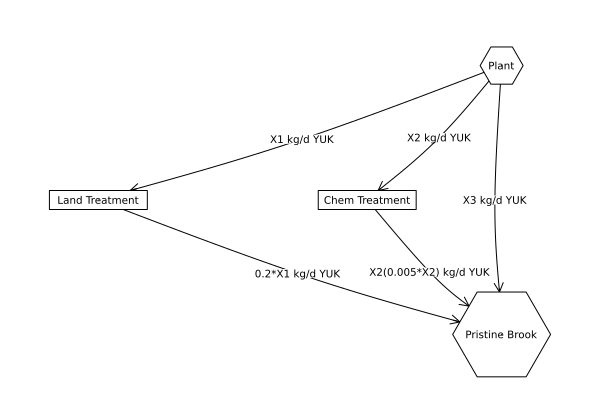

In [145]:
using GraphRecipes, Plots

A = [0 1 1 1;
    0 0 0 1;
    0 0 0 1;
    0 0 0 0]

names = ["Plant", "Land Treatment", "Chem Treatment", "Pristine Brook"]
# modify this dictionary to add labels
edge_labels = Dict(
    (1, 2) => "X1 kg/d YUK", # volume of wastewater to land treatment is X1
    (1, 3) => "X2 kg/d YUK", # volume to chem treatment is X2
    (1, 4) => "X3 kg/d YUK", # V3 is volume with no treatment
    (2, 4) => "0.2*X1 kg/d YUK", # 20% of yuk drains into stream with land dispo
    (3, 4) => "X2(0.005*X2) kg/d YUK" # 50% of yuk is treated since e = 0.5. eqn is 0.005X2 instead of 1-0.005X2 since we want % YUK remaining after removal, not % removed
)

shapes=[:hexagon, :rect, :rect, :hexagon]
xpos = [1, -2, 0, 1]
ypos = [1, 0, 0, -1]

graphplot(A, names=names,edgelabel=edge_labels, markersize=0.15, markershapes=shapes, markercolor=:white, x=xpos, y=ypos)

#### Problem 4.2 (4 points)

Formulate a mathematical model for the treatment cost and the amount of
YUK that will be discharged into Pristine Brook based on the wastewater
allocations. This is best done with some equations and supporting text
explaining the derivation. Make sure you include, as additional
equations in the model, any needed constraints on relevant values. You
can find some basics on writing mathematical equations using the LaTeX
typesetting syntax
[here](https://viveks.me/environmental-systems-analysis/tutorials/latex-notebook.qmd),
and a cheatsheet with LaTeX commands can be found on the course
website’s [Resources
page](https://viveks.me/environmental-systems-analysis/resources/markdown.qmd).

In [146]:
vol_total = 100; # m3/d wastewater
x1 = 70 # vol land treatment
x2 = 20 # vol chem treatment
x3 = 10 # vol no treatment

    land_yuk = 0.2*x1; # kg/d YUK effluent from land
    land_cost = x1^2/20; # cost/day of land treatment 
    chem_yuk = x2*(.005*x2); # kg/d YUK from chem
    chem_cost = 1.5*x2; # cost chem
    nothing_yuk = x3; # amount of yuk from no treatment
    nothing_cost = 0;
    total_yuk = land_yuk + chem_yuk + nothing_yuk # kg/day yuk from all treatments 
    total_cost = land_cost + chem_cost + nothing_cost # total cost

println(total_yuk, "kg/d YUK to Pristine Brook")
println(total_cost, "cost per day")

26.0kg/d YUK to Pristine Brook
275.0cost per day


#### Problem 4.3 (4 points)

Implement this systems model as a Julia function which computes the
resulting YUK concentration and cost for a particular treatment plan.
You can return multiple values from a function with a
[tuple](https://docs.julialang.org/en/v1/manual/functions/#Tuples-1), as
in:

In [147]:
function yukdischarge(x1, x2, x3)
    vol_total = 100; # m3/d wastewater
    if x1+x2+x3 == vol_total # volume inputs must add up to total volume
        land_yuk = 0.2*x1; # kg/d YUK effluent from land
        land_cost = x1^2/20; # cost/day of land treatment 
        chem_yuk = x2*(.005*x2); # kg/d YUK from chem
        chem_cost = 1.5*x2; # cost chem
        nothing_yuk = x3; # amount of yuk from no treatment
        nothing_cost = 0;
        total_yuk = land_yuk + chem_yuk + nothing_yuk # kg/day yuk from all treatments 
        total_cost = land_cost + chem_cost + nothing_cost # total cost
    else 
        println("volumes are incorrect")
    end
    println(total_yuk, "kg/d YUK to Pristine Brook")
    println(total_cost, "cost per day")
end

yukdischarge (generic function with 1 method)

Make sure you comment your code appropriately to make it clear what is
going on and why.

#### Problem 4.4 (5 points)

Use your function to experiment with some different combinations of
wastewater discharge and treatment. Can you find one that satisfies the
YUK effluent standard? What was the cost? You don’t have to find an
“optimal” solution to this problem, but what do you think would be
needed to find a better solution?

In [151]:
yukdischarge(80, 20, 0)

18.0kg/d YUK to Pristine Brook
350.0cost per day


Allocating 80 m3/d to land treatment, 20 m3/d to chemical treatment, and 0 m3/d to no treatment resulted in a effluent YUK of 18 kg/day, less than the EPA standard of 20 kg/day.
The cost was 350$/day, which is cheaper than 100% land treatment

## References

List any external references consulted, including classmates.

https://stackoverflow.blog/2021/12/23/best-practices-for-writing-code-comments/

https://chat.openai.com/share/ffb02aa3-76e5-40a0-85fe-21d72e2c14d6

asked chatgpt how to use git commands in terminal (chat linked above)